In [1]:
!pip install pmdarima

In [2]:
!pip install plotly

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose



In [4]:
asianpaint = pd.read_csv("ASIANPAINT.csv")

In [5]:
print("Asian Paints Stock Shape: ", asianpaint.shape)

Asian Paints Stock Shape:  (5204, 15)


In [6]:
print(asianpaint.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [7]:
asianpaint.head()

Date      Symbol Series  Prev Close   Open   High    Low   Last  \
0  2000-01-03  ASIANPAINT     EQ      361.20  370.0  390.0  370.0  385.0   
1  2000-01-04  ASIANPAINT     EQ      381.65  380.0  392.0  375.0  390.0   
2  2000-01-05  ASIANPAINT     EQ      385.55  371.5  390.0  371.5  383.0   
3  2000-01-06  ASIANPAINT     EQ      383.00  384.9  384.9  374.5  375.1   
4  2000-01-07  ASIANPAINT     EQ      377.50  376.0  390.0  370.0  389.0   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  381.65  380.54    3318  1.262617e+11     NaN                 NaN   
1  385.55  383.50    4818  1.847699e+11     NaN                 NaN   
2  383.00  379.81    2628  9.981384e+10     NaN                 NaN   
3  377.50  379.88    3354  1.274114e+11     NaN                 NaN   
4  385.70  383.38    9589  3.676275e+11     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [8]:
asianpaint.tail()

Date      Symbol Series  Prev Close     Open     High      Low  \
5199  2020-11-23  ASIANPAINT     EQ     2166.55  2160.55  2196.95  2138.80   
5200  2020-11-24  ASIANPAINT     EQ     2186.25  2192.90  2231.00  2191.00   
5201  2020-11-25  ASIANPAINT     EQ     2207.90  2197.25  2208.70  2150.00   
5202  2020-11-26  ASIANPAINT     EQ     2154.30  2160.00  2177.45  2117.15   
5203  2020-11-27  ASIANPAINT     EQ     2155.30  2170.00  2244.60  2165.00   

         Last    Close     VWAP    Volume      Turnover    Trades  \
5199  2188.00  2186.25  2158.20   4002609  8.638445e+14  121561.0   
5200  2205.00  2207.90  2215.45   2954306  6.545112e+14  119163.0   
5201  2156.00  2154.30  2172.26   1682365  3.654528e+14   79887.0   
5202  2160.00  2155.30  2139.91   2247478  4.809392e+14   85597.0   
5203  2198.55  2215.30  2208.61  10036402  2.216650e+15  174090.0   

      Deliverable Volume  %Deliverble  
5199           2465120.0       0.6159  
5200           1436478.0       0.4862  
5201            613963.0       0.3649  
5202            858868.0       0.3821  
5203           7938427.0       0.7910

In [9]:
print(asianpaint.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4695 non-null   float64
 14  %Deliverble         4695 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

In [10]:
asianpaint.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean   1221.942439  1222.514623  1239.170821  1206.118515  1222.194533   
std    1069.550642  1069.036414  1082.226310  1057.840335  1069.515894   
min     210.750000   210.000000   215.750000   204.000000   210.600000   
25%     410.000000   410.000000   416.975000   405.000000   410.287500   
50%     878.675000   879.975000   890.000000   866.475000   879.000000   
75%    1470.012500  1464.175000  1482.650000  1451.700000  1471.275000   
max    5213.100000  5221.100000  5247.750000  5150.050000  5221.100000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03    2354.000000   
mean   1222.298722  1222.708603  4.752047e+05  5.960024e+13   38661.382328   
std    1069.572675  1070.195566  8.087045e+05  1.203556e+14   33686.852678   
min     210.750000   212.220000  2.500000e+01  1.278415e+09      70.000000   
25%     410.000000   410.177500  1.334250e+04  7.344369e+11   15210.000000   
50%     878.850000   878.055000  5.405900e+04  9.656732e+12   30925.000000   
75%    1471.450000  1467.525000  7.575392e+05  7.295915e+13   51181.250000   
max    5213.100000  5175.790000  1.154594e+07  2.216650e+15  351347.000000   

       Deliverable Volume  %Deliverble  
count        4.695000e+03  4695.000000  
mean         2.631722e+05     0.631557  
std          4.024664e+05     0.184460  
min          2.500000e+01     0.127500  
25%          1.222050e+04     0.494700  
50%          4.894100e+04     0.622000  
75%          4.202050e+05     0.769250  
max          7.938427e+06     1.000000

In [11]:
print("Number of features = ", len(asianpaint.axes[1]))

print("Features: ")
id = 1
for ft in asianpaint.axes[1]:
    print(id,ft)
    id = id + 1

Number of features =  15
Features: 
1 Date
2 Symbol
3 Series
4 Prev Close
5 Open
6 High
7 Low
8 Last
9 Close
10 VWAP
11 Volume
12 Turnover
13 Trades
14 Deliverable Volume
15 %Deliverble


In [12]:
icici = pd.read_csv("ICICIBANK.csv")
itc = pd.read_csv("ITC.csv")
britannia = pd.read_csv("BRITANNIA.csv")
grasim = pd.read_csv("GRASIM.csv")
bpcl = pd.read_csv("BPCL.csv")
axisbank = pd.read_csv("AXISBANK.csv")
airtel = pd.read_csv("BHARTIARTL.csv")

In [13]:
print("Asian Paints Stock Shape: ", asianpaint.shape)
print("Asian Paints Stock Shape: ", asianpaint.shape)
print("Asian Paints Stock Shape: ", asianpaint.shape)
print("Asian Paints Stock Shape: ", asianpaint.shape)
print("Asian Paints Stock Shape: ", asianpaint.shape)
print("Asian Paints Stock Shape: ", asianpaint.shape)

Asian Paints Stock Shape:  (5204, 15)
Asian Paints Stock Shape:  (5204, 15)
Asian Paints Stock Shape:  (5204, 15)
Asian Paints Stock Shape:  (5204, 15)
Asian Paints Stock Shape:  (5204, 15)
Asian Paints Stock Shape:  (5204, 15)


In [14]:
print("Bharti Aitel Stock Shape: ", asianpaint.shape)
print("Grasim Stock Shape: ", asianpaint.shape)
print("BPCL Stock Shape: ", asianpaint.shape)
print("Axis Bank Stock Shape: ", asianpaint.shape)
print("Britannia Stock Shape: ", asianpaint.shape)
print("ITC Stock Shape: ", asianpaint.shape)
print("ICICI Bank Stock Shape: ", asianpaint.shape)

Bharti Aitel Stock Shape:  (5204, 15)
Grasim Stock Shape:  (5204, 15)
BPCL Stock Shape:  (5204, 15)
Axis Bank Stock Shape:  (5204, 15)
Britannia Stock Shape:  (5204, 15)
ITC Stock Shape:  (5204, 15)
ICICI Bank Stock Shape:  (5204, 15)


In [15]:
itc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5204 non-null   object 
 1   Symbol              5204 non-null   object 
 2   Series              5204 non-null   object 
 3   Prev Close          5204 non-null   float64
 4   Open                5204 non-null   float64
 5   High                5204 non-null   float64
 6   Low                 5204 non-null   float64
 7   Last                5204 non-null   float64
 8   Close               5204 non-null   float64
 9   VWAP                5204 non-null   float64
 10  Volume              5204 non-null   int64  
 11  Turnover            5204 non-null   float64
 12  Trades              2354 non-null   float64
 13  Deliverable Volume  4690 non-null   float64
 14  %Deliverble         4690 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 610.0

In [16]:
plt.style.use('classic')


In [17]:
ab_numeric = axisbank.select_dtypes(include='number')

ab_numeric

Prev Close    Open    High     Low    Last   Close    VWAP    Volume  \
0          24.70   26.70   26.70   26.70   26.70   26.70   26.70    112100   
1          26.70   27.00   28.70   26.50   27.00   26.85   27.24    234500   
2          26.85   26.00   27.75   25.50   26.40   26.30   26.24    170100   
3          26.30   25.80   27.00   25.80   25.90   25.95   26.27    102100   
4          25.95   25.00   26.00   24.25   25.00   24.80   25.04     62600   
...          ...     ...     ...     ...     ...     ...     ...       ...   
5199      607.85  610.95  612.60  592.70  596.95  595.60  601.27  23728765   
5200      595.60  603.00  622.60  600.55  619.00  619.65  612.87  30742369   
5201      619.65  625.00  630.00  596.00  598.35  599.85  613.56  35115637   
5202      599.85  602.25  618.20  594.05  611.50  612.55  608.19  35476456   
5203      612.55  612.00  613.65  598.75  605.10  601.60  605.39  29921076   

          Turnover    Trades  Deliverable Volume  %Deliverble  
0     2.993070e+11       NaN                 NaN          NaN  
1     6.387275e+11       NaN                 NaN          NaN  
2     4.462980e+11       NaN                 NaN          NaN  
3     2.681730e+11       NaN                 NaN          NaN  
4     1.567220e+11       NaN                 NaN          NaN  
...            ...       ...                 ...          ...  
5199  1.426744e+15  282449.0           6319602.0       0.2663  
5200  1.884117e+15  375786.0           9971416.0       0.3244  
5201  2.154561e+15  345527.0           9454641.0       0.2692  
5202  2.157653e+15  323021.0           7986804.0       0.2251  
5203  1.811385e+15  222217.0          14229087.0       0.4756  

[5204 rows x 12 columns]

In [18]:
ab_numeric = axisbank.select_dtypes(include='number')
ab_numeric = axisbank.select_dtypes(include='number')
ab_numeric = axisbank.select_dtypes(include='number')

ab_numeric

Prev Close    Open    High     Low    Last   Close    VWAP    Volume  \
0          24.70   26.70   26.70   26.70   26.70   26.70   26.70    112100   
1          26.70   27.00   28.70   26.50   27.00   26.85   27.24    234500   
2          26.85   26.00   27.75   25.50   26.40   26.30   26.24    170100   
3          26.30   25.80   27.00   25.80   25.90   25.95   26.27    102100   
4          25.95   25.00   26.00   24.25   25.00   24.80   25.04     62600   
...          ...     ...     ...     ...     ...     ...     ...       ...   
5199      607.85  610.95  612.60  592.70  596.95  595.60  601.27  23728765   
5200      595.60  603.00  622.60  600.55  619.00  619.65  612.87  30742369   
5201      619.65  625.00  630.00  596.00  598.35  599.85  613.56  35115637   
5202      599.85  602.25  618.20  594.05  611.50  612.55  608.19  35476456   
5203      612.55  612.00  613.65  598.75  605.10  601.60  605.39  29921076   

          Turnover    Trades  Deliverable Volume  %Deliverble  
0     2.993070e+11       NaN                 NaN          NaN  
1     6.387275e+11       NaN                 NaN          NaN  
2     4.462980e+11       NaN                 NaN          NaN  
3     2.681730e+11       NaN                 NaN          NaN  
4     1.567220e+11       NaN                 NaN          NaN  
...            ...       ...                 ...          ...  
5199  1.426744e+15  282449.0           6319602.0       0.2663  
5200  1.884117e+15  375786.0           9971416.0       0.3244  
5201  2.154561e+15  345527.0           9454641.0       0.2692  
5202  2.157653e+15  323021.0           7986804.0       0.2251  
5203  1.811385e+15  222217.0          14229087.0       0.4756  

[5204 rows x 12 columns]

In [19]:
ab_numeric = axisbank.select_dtypes(include='number')
gs_numeric = grasim.select_dtypes(include='number')
it_numeric = itc.select_dtypes(include='number')
ic_numeric = icici.select_dtypes(include='number')
as_numeric = asianpaint.select_dtypes(include='number')
ai_numeric = airtel.select_dtypes(include='number')

print("Airtel")
ai_numeric

Airtel


Prev Close    Open    High     Low    Last   Close    VWAP    Volume  \
0           0.00   51.90   51.90   43.50   44.70   44.35   46.00  10381190   
1          44.35   45.15   45.15   41.30   41.35   41.70   42.58   3552660   
2          41.70   40.60   42.80   40.25   41.20   41.25   41.56   2512964   
3          41.25   42.85   43.40   42.15   42.20   42.40   42.76   1338196   
4          42.40   42.65   43.60   41.10   43.35   43.30   42.75    811327   
...          ...     ...     ...     ...     ...     ...     ...       ...   
4667      483.70  486.75  486.75  475.10  476.75  477.25  479.21  10005675   
4668      477.25  478.40  481.25  471.20  475.50  474.25  475.07   9173967   
4669      474.25  476.50  477.90  458.65  464.30  464.10  467.61  14229948   
4670      464.10  468.70  469.65  460.10  469.00  468.40  465.71  11322533   
4671      468.40  468.30  472.65  462.00  465.00  463.25  465.57  18151096   

          Turnover    Trades  Deliverable Volume  %Deliverble  
0     4.775431e+13       NaN           6503775.0       0.6265  
1     1.512609e+13       NaN           1741184.0       0.4901  
2     1.044348e+13       NaN                 NaN          NaN  
3     5.722681e+12       NaN            485969.0       0.3632  
4     3.468413e+12       NaN            399133.0       0.4920  
...            ...       ...                 ...          ...  
4667  4.794771e+14  149571.0           2732654.0       0.2731  
4668  4.358263e+14  129133.0           3180607.0       0.3467  
4669  6.654006e+14  208648.0           5602463.0       0.3937  
4670  5.273040e+14  133329.0           3915411.0       0.3458  
4671  8.450527e+14  185490.0          10410609.0       0.5736  

[4672 rows x 12 columns]

In [20]:
print("ITC")
it_numeric

ITC


Prev Close    Open    High     Low    Last   Close    VWAP    Volume  \
0         656.00  694.00  708.50  675.00  708.50  708.50  701.81    562715   
1         708.50  714.00  729.00  694.30  710.65  712.35  714.16    712637   
2         712.35  716.25  758.90  660.00  731.00  726.20  732.43   1382149   
3         726.20  741.00  784.30  741.00  784.30  784.30  776.63    721618   
4         784.30  832.40  847.05  824.00  847.05  847.05  841.25    231209   
...          ...     ...     ...     ...     ...     ...     ...       ...   
5199      191.70  192.00  192.50  188.65  190.85  190.85  190.40  23180456   
5200      190.85  190.60  196.45  190.60  195.65  195.55  194.63  45411815   
5201      195.55  196.00  197.95  192.50  193.40  193.85  195.33  41659179   
5202      193.85  195.10  195.85  192.55  194.95  194.80  194.10  24222956   
5203      194.80  194.45  195.75  193.20  193.50  193.65  194.29  31385396   

          Turnover    Trades  Deliverable Volume  %Deliverble  
0     3.949174e+13       NaN                 NaN          NaN  
1     5.089379e+13       NaN                 NaN          NaN  
2     1.012325e+14       NaN                 NaN          NaN  
3     5.604266e+13       NaN                 NaN          NaN  
4     1.945046e+13       NaN                 NaN          NaN  
...            ...       ...                 ...          ...  
5199  4.413519e+14  122117.0           7067642.0       0.3049  
5200  8.838634e+14  207600.0          17801793.0       0.3920  
5201  8.137368e+14  173811.0          11536619.0       0.2769  
5202  4.701587e+14  108953.0           7028927.0       0.2902  
5203  6.097929e+14  117535.0          17280078.0       0.5506  

[5204 rows x 12 columns]

In [21]:
print("ICICI Bank")
ic_numeric

ICICI Bank


Prev Close    Open    High     Low    Last   Close    VWAP    Volume  \
0          69.20   74.35   74.75   71.40   74.75   74.75   73.20    286260   
1          74.75   73.05   78.50   71.00   73.25   73.05   73.38    296264   
2          73.05   70.00   73.50   67.50   70.00   69.50   70.85    227624   
3          69.50   71.00   74.00   69.55   69.75   70.05   72.04    275149   
4          70.05   69.00   72.50   66.00   67.00   67.40   68.72    138809   
...          ...     ...     ...     ...     ...     ...     ...       ...   
5199      480.20  481.80  483.35  466.50  468.30  468.25  472.40  29513544   
5200      468.25  474.00  480.00  471.20  479.00  478.20  475.60  23135994   
5201      478.20  485.00  489.95  471.10  472.20  472.70  481.71  34168305   
5202      472.70  475.10  477.20  465.80  477.00  475.30  471.79  28707911   
5203      475.30  476.40  479.55  471.30  474.30  473.35  474.84  48390771   

          Turnover    Trades  Deliverable Volume  %Deliverble  
0     2.095439e+12       NaN                 NaN          NaN  
1     2.173893e+12       NaN                 NaN          NaN  
2     1.612794e+12       NaN                 NaN          NaN  
3     1.982121e+12       NaN                 NaN          NaN  
4     9.538882e+11       NaN                 NaN          NaN  
...            ...       ...                 ...          ...  
5199  1.394225e+15  303018.0          11243809.0       0.3810  
5200  1.100354e+15  240284.0           9426987.0       0.4075  
5201  1.645916e+15  309210.0           9933859.0       0.2907  
5202  1.354423e+15  279104.0           9365527.0       0.3262  
5203  2.297771e+15  223863.0          30805507.0       0.6366  

[5204 rows x 12 columns]

In [22]:
icici['Trades'] = icici['Trades'].astype('float64')

In [23]:
icici.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    550.536261   551.194744   560.218303   541.143390   550.672608   
std     372.314033   372.423267   377.662056   366.869006   372.235819   
min      67.400000    67.000000    70.450000    66.000000    67.000000   
25%     265.800000   265.975000   269.800000   262.050000   265.800000   
50%     392.050000   392.125000   399.000000   385.275000   392.500000   
75%     878.462500   880.150000   892.000000   864.075000   878.200000   
max    1794.100000  1767.050000  1798.150000  1760.150000  1793.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03    2354.000000   
mean    550.613922   550.767542  7.889814e+06  3.549615e+14  132823.264231   
std     372.255758   372.278713  1.200192e+07  4.499403e+14   95803.933033   
min      67.400000    68.520000  7.409000e+03  9.617283e+10    2595.000000   
25%     265.912500   265.922500  9.332090e+05  3.297766e+13   78440.500000   
50%     392.075000   392.135000  3.363532e+06  2.863644e+14  107452.500000   
75%     878.462500   877.732500  1.073832e+07  4.828040e+14  152706.000000   
max    1794.100000  1783.460000  2.868577e+08  1.461959e+16  949891.000000   

       Deliverable Volume  %Deliverble  
count        4.687000e+03  4687.000000  
mean         4.044934e+06     0.474588  
std          6.344515e+06     0.132343  
min          1.501500e+04     0.099000  
25%          6.758135e+05     0.384950  
50%          1.902303e+06     0.477600  
75%          5.505945e+06     0.566250  
max          2.325307e+08     0.983000

In [24]:
itc['Trades'] = itc['Trades'].astype('float64')
britannia['Trades'] = britannia['Trades'].astype('float64')
axisbank['Trades'] = axisbank['Trades'].astype('float64')
asianpaint['Trades'] = asianpaint['Trades'].astype('float64')
bpcl['Trades'] = bpcl['Trades'].astype('float64')
airtel['Trades'] = airtel['Trades'].astype('float64')
grasim['Trades'] = grasim['Trades'].astype('float64')

<AxesSubplot:>

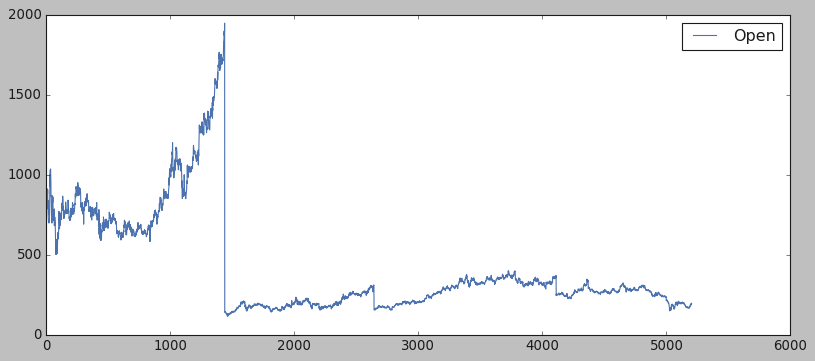

In [25]:
itc['Open'].plot(legend=True,figsize=(12,5))

# HDFC NIFTY STOCK ANALYSIS

In [26]:
df = pd.read_csv("HDFC.csv")
df

Date Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03   HDFC     EQ      271.75   293.50   293.50   293.50   
1     2000-01-04   HDFC     EQ      293.50   317.00   317.00   297.00   
2     2000-01-05   HDFC     EQ      304.05   290.00   303.90   285.00   
3     2000-01-06   HDFC     EQ      292.80   301.00   314.00   295.00   
4     2000-01-07   HDFC     EQ      296.45   290.00   296.35   281.00   
...          ...    ...    ...         ...      ...      ...      ...   
5199  2020-11-23   HDFC     EQ     2334.80  2344.20  2347.85  2230.10   
5200  2020-11-24   HDFC     EQ     2250.80  2272.25  2272.25  2209.55   
5201  2020-11-25   HDFC     EQ     2217.70  2228.00  2252.15  2179.30   
5202  2020-11-26   HDFC     EQ     2191.35  2197.15  2245.00  2187.65   
5203  2020-11-27   HDFC     EQ     2238.40  2240.00  2272.45  2202.20   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      293.50   293.50   293.50     22744  6.675364e+11       NaN   
1      304.00   304.05   303.62    255251  7.749972e+12       NaN   
2      295.00   292.80   294.53    269087  7.925368e+12       NaN   
3      296.00   296.45   300.14    305916  9.181669e+12       NaN   
4      287.10   286.55   288.80    197039  5.690480e+12       NaN   
...       ...      ...      ...       ...           ...       ...   
5199  2253.05  2250.80  2266.43   6995598  1.585502e+15  218301.0   
5200  2220.00  2217.70  2232.36   4945274  1.103962e+15  205979.0   
5201  2186.80  2191.35  2210.08   6150483  1.359307e+15  217608.0   
5202  2242.70  2238.40  2215.19   5026304  1.113421e+15  208269.0   
5203  2238.00  2256.25  2239.94  10179511  2.280151e+15  213049.0   

      Deliverable Volume  %Deliverble  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3                    NaN          NaN  
4                    NaN          NaN  
...                  ...          ...  
5199           3547873.0       0.5072  
5200           2659204.0       0.5377  
5201           3048448.0       0.4956  
5202           2466256.0       0.4907  
5203           6246018.0       0.6136  

[5204 rows x 15 columns]

In [27]:
df.tail()


Date Symbol Series  Prev Close     Open     High      Low  \
5199  2020-11-23   HDFC     EQ     2334.80  2344.20  2347.85  2230.10   
5200  2020-11-24   HDFC     EQ     2250.80  2272.25  2272.25  2209.55   
5201  2020-11-25   HDFC     EQ     2217.70  2228.00  2252.15  2179.30   
5202  2020-11-26   HDFC     EQ     2191.35  2197.15  2245.00  2187.65   
5203  2020-11-27   HDFC     EQ     2238.40  2240.00  2272.45  2202.20   

         Last    Close     VWAP    Volume      Turnover    Trades  \
5199  2253.05  2250.80  2266.43   6995598  1.585502e+15  218301.0   
5200  2220.00  2217.70  2232.36   4945274  1.103962e+15  205979.0   
5201  2186.80  2191.35  2210.08   6150483  1.359307e+15  217608.0   
5202  2242.70  2238.40  2215.19   5026304  1.113421e+15  208269.0   
5203  2238.00  2256.25  2239.94  10179511  2.280151e+15  213049.0   

      Deliverable Volume  %Deliverble  
5199           3547873.0       0.5072  
5200           2659204.0       0.5377  
5201           3048448.0       0.4956  
5202           2466256.0       0.4907  
5203           6246018.0       0.6136

In [28]:
price = df[['Date','Close']]
price.head(20)

Date   Close
0   2000-01-03  293.50
1   2000-01-04  304.05
2   2000-01-05  292.80
3   2000-01-06  296.45
4   2000-01-07  286.55
5   2000-01-10  287.20
6   2000-01-11  283.85
7   2000-01-12  285.60
8   2000-01-13  283.85
9   2000-01-14  286.55
10  2000-01-17  302.20
11  2000-01-18  305.75
12  2000-01-19  305.25
13  2000-01-20  291.35
14  2000-01-21  299.55
15  2000-01-24  293.05
16  2000-01-25  303.15
17  2000-01-27  316.60
18  2000-01-28  324.40
19  2000-01-31  333.50

In [29]:
price.Date = pd.to_datetime(price.Date, format="%Y-%m-%d")
price = price[(price['Date'] > pd.Timestamp(2019,1,1))]
price.head()

/home/ratishankar/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Date    Close
4730 2019-01-02  1980.65
4731 2019-01-03  1936.85
4732 2019-01-04  1972.60
4733 2019-01-07  1972.90
4734 2019-01-08  1958.95

In [30]:
price.tail()

Date    Close
5199 2020-11-23  2250.80
5200 2020-11-24  2217.70
5201 2020-11-25  2191.35
5202 2020-11-26  2238.40
5203 2020-11-27  2256.25

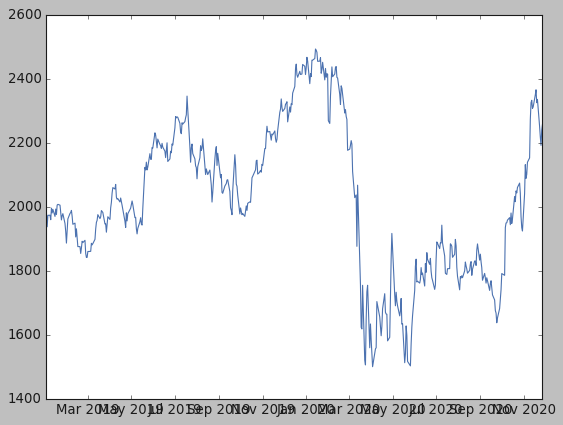

<Figure size 1920x1760 with 0 Axes>

In [31]:
plt.plot(price.Date, price.Close)
plt.figure(figsize=(24,22))
plt.gcf().autofmt_xdate() 
plt.show()

<Figure size 4800x9600 with 0 Axes>

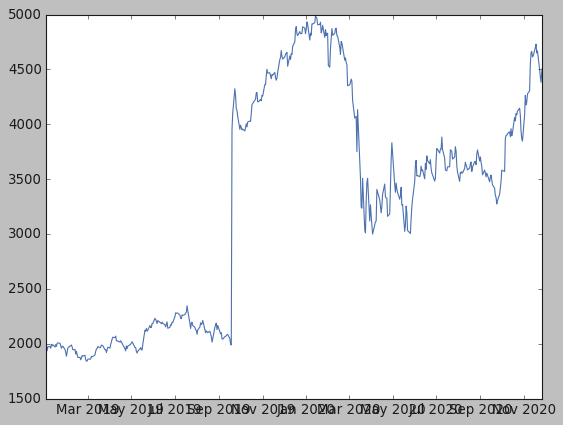

<Figure size 4800x9600 with 0 Axes>

In [32]:
price.Close = price.Close.mask( price.Date >='2019-09-19', price.Close*2)

plt.plot(price.Date, price.Close)
plt.figure(figsize=(60,120))

# RELIANCE NIFTY STOCK ANALYSIS

Import dataset 

In [33]:
rel = pd.read_csv('RELIANCE.csv')

Converting Date into DateTime format

In [34]:
rel['Date']=pd.to_datetime(rel['Date'])
rel.set_index(['Date'],inplace=True)


In [35]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5204 entries, 2000-01-03 to 2020-11-27
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5204 non-null   object 
 1   Series              5204 non-null   object 
 2   Prev Close          5204 non-null   float64
 3   Open                5204 non-null   float64
 4   High                5204 non-null   float64
 5   Low                 5204 non-null   float64
 6   Last                5204 non-null   float64
 7   Close               5204 non-null   float64
 8   VWAP                5204 non-null   float64
 9   Volume              5204 non-null   int64  
 10  Turnover            5204 non-null   float64
 11  Trades              2354 non-null   float64
 12  Deliverable Volume  4690 non-null   float64
 13  %Deliverble         4690 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 609.8+ KB


In [36]:
rel.describe()

Prev Close         Open         High          Low         Last  \
count  5204.000000  5204.000000  5204.000000  5204.000000  5204.000000   
mean    991.573146   993.152488  1007.210386   977.650846   991.744716   
std     559.193166   560.779485   570.274651   548.810030   559.142833   
min     203.200000   205.500000   219.500000   197.150000   203.300000   
25%     564.125000   565.987500   574.575000   555.350000   563.825000   
50%     929.400000   930.975000   941.675000   920.000000   929.550000   
75%    1210.675000  1211.000000  1231.662500  1193.075000  1213.550000   
max    3220.850000  3298.000000  3298.000000  3141.300000  3223.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  5204.000000  5204.000000  5.204000e+03  5.204000e+03  2.354000e+03   
mean    991.899193   992.505048  5.477416e+06  5.766197e+14  1.383930e+05   
std     559.245468   559.404639  4.939589e+06  8.067358e+14  1.261135e+05   
min     203.200000   212.290000  5.282000e+04  4.295543e+12  2.991000e+03   
25%     564.600000   563.172500  2.818465e+06  2.172170e+14  7.120650e+04   
50%     929.600000   930.265000  4.153304e+06  3.597578e+14  9.841550e+04   
75%    1210.750000  1211.957500  6.424490e+06  6.388226e+14  1.559138e+05   
max    3220.850000  3197.750000  6.523089e+07  1.473434e+16  1.428490e+06   

       Deliverable Volume  %Deliverble  
count        4.690000e+03  4690.000000  
mean         2.240034e+06     0.436304  
std          1.861371e+06     0.145547  
min          2.909700e+04     0.076300  
25%          1.178495e+06     0.322925  
50%          1.784206e+06     0.452250  
75%          2.685708e+06     0.546275  
max          3.495888e+07     0.978300

In [37]:
rel.shape

(5204, 14)

Visualizing the locations of the missing data

<AxesSubplot:>

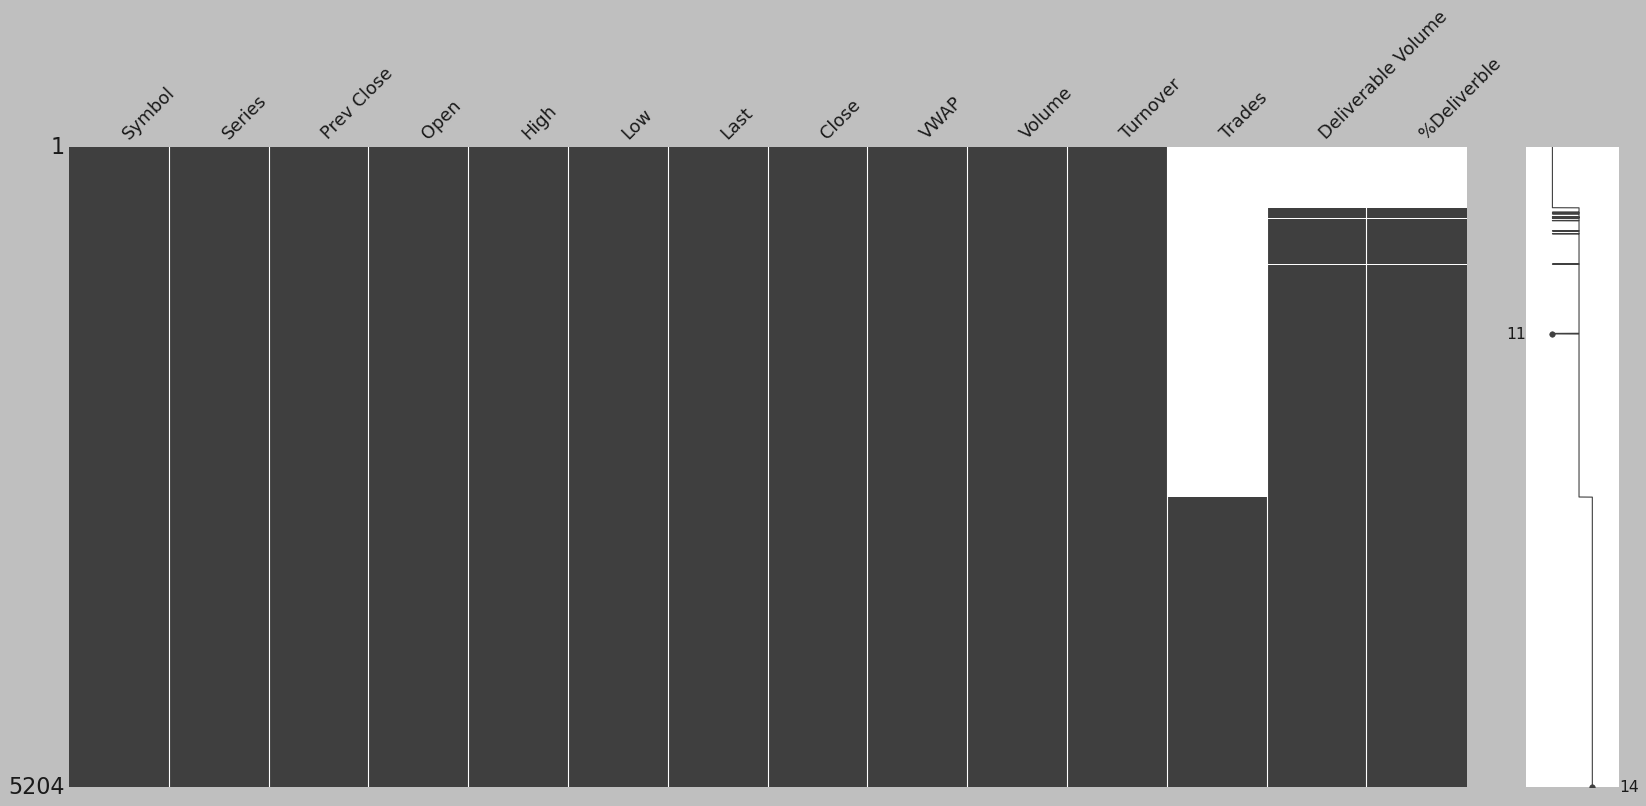

In [38]:
msno.matrix(rel)

As you can see all the starting values are missing in columns Trades , Deliverable Volume and %Deliverble 

<AxesSubplot:xlabel='Date'>

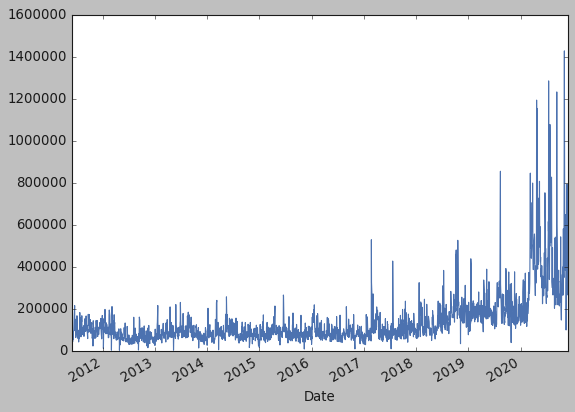

In [39]:
rel.Trades.plot()

As we can see, Reliance stock has upscalled tremendously in recent times.

In [40]:
rel.Trades[:2850]

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
              ..
2011-05-25   NaN
2011-05-26   NaN
2011-05-27   NaN
2011-05-30   NaN
2011-05-31   NaN
Name: Trades, Length: 2850, dtype: float64

we don't have data of Trades on and before 31-05-2011 

In [41]:
rel.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)

removing missing columns
#### Plotting VWAP(Volume Weighted Average Price) over time

In [42]:
fig = go.Figure([go.Scatter(x=rel.index, y=rel['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

#### Visualising using KDEs

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

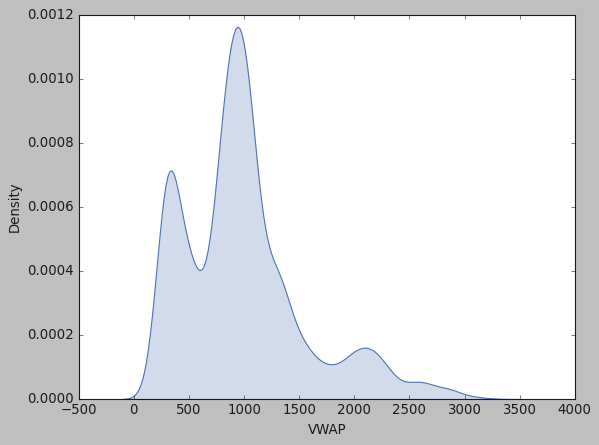

In [43]:
sns.kdeplot(rel['VWAP'],shade=True)

There are two picks in VWAP prices

In [44]:
fig = go.Figure([go.Scatter(x=rel.loc['2019', 'VWAP'].index,y=rel.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2019',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show()

2019 Reliance market data analysis 

In [45]:
fig = go.Figure([go.Scatter(x=rel.loc['2020', 'VWAP'].index,y=rel.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2020',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

Such plots help analyze the market and study how, company policies, news and project details affect their stock price.


### Open,close,High,low prices over time

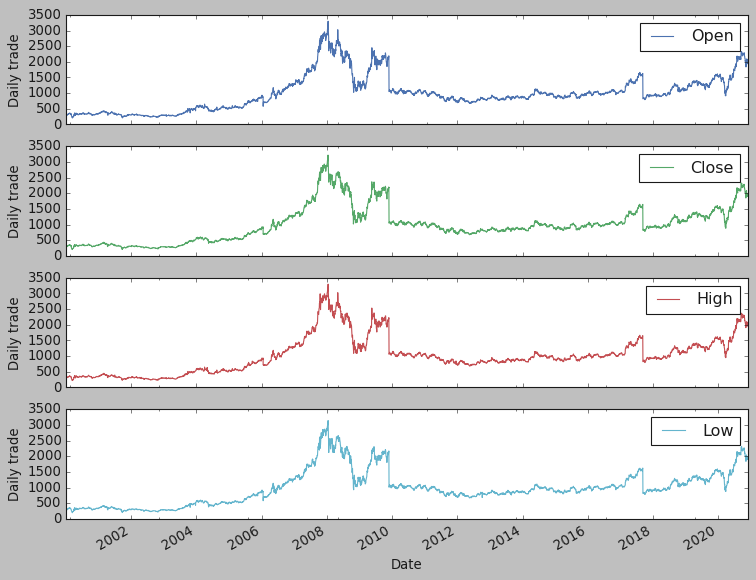

In [46]:
cols_plot = ['Open', 'Close', 'High','Low']
axes = rel[cols_plot].plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

All are following same pattern 

### Volume over Time

In [47]:
fig = go.Figure([go.Scatter(x=rel.index, y=rel['Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

### Volume in 2020

In [48]:
fig = go.Figure([go.Scatter(x=rel.loc['2020', 'Volume'].index,y=rel.loc['2020', 'Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume in 2020'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

### Q-Q plot of VWAP
used to determine whether dataset is distributed a certain way

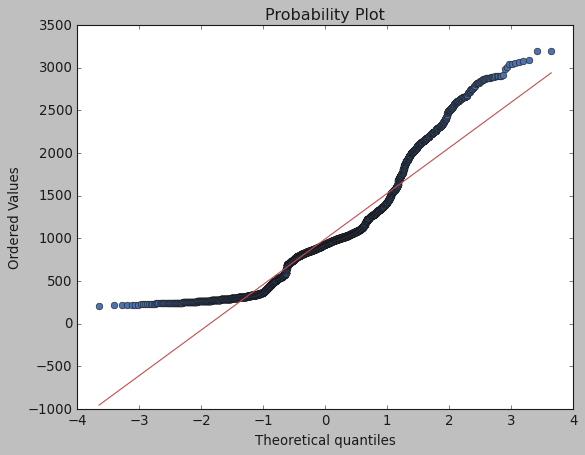

In [49]:
scipy.stats.probplot(rel.VWAP,plot=pylab)
pylab.show()

data is not normally distributed , however this is what we usually expect from timeseries

### Check Stationarity i.e Dicky Fuller Test


The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. 
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [50]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [51]:
dicky_fuller_test(rel['VWAP'])

ADF Statistic: -1.892609
p-value: 0.335546
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


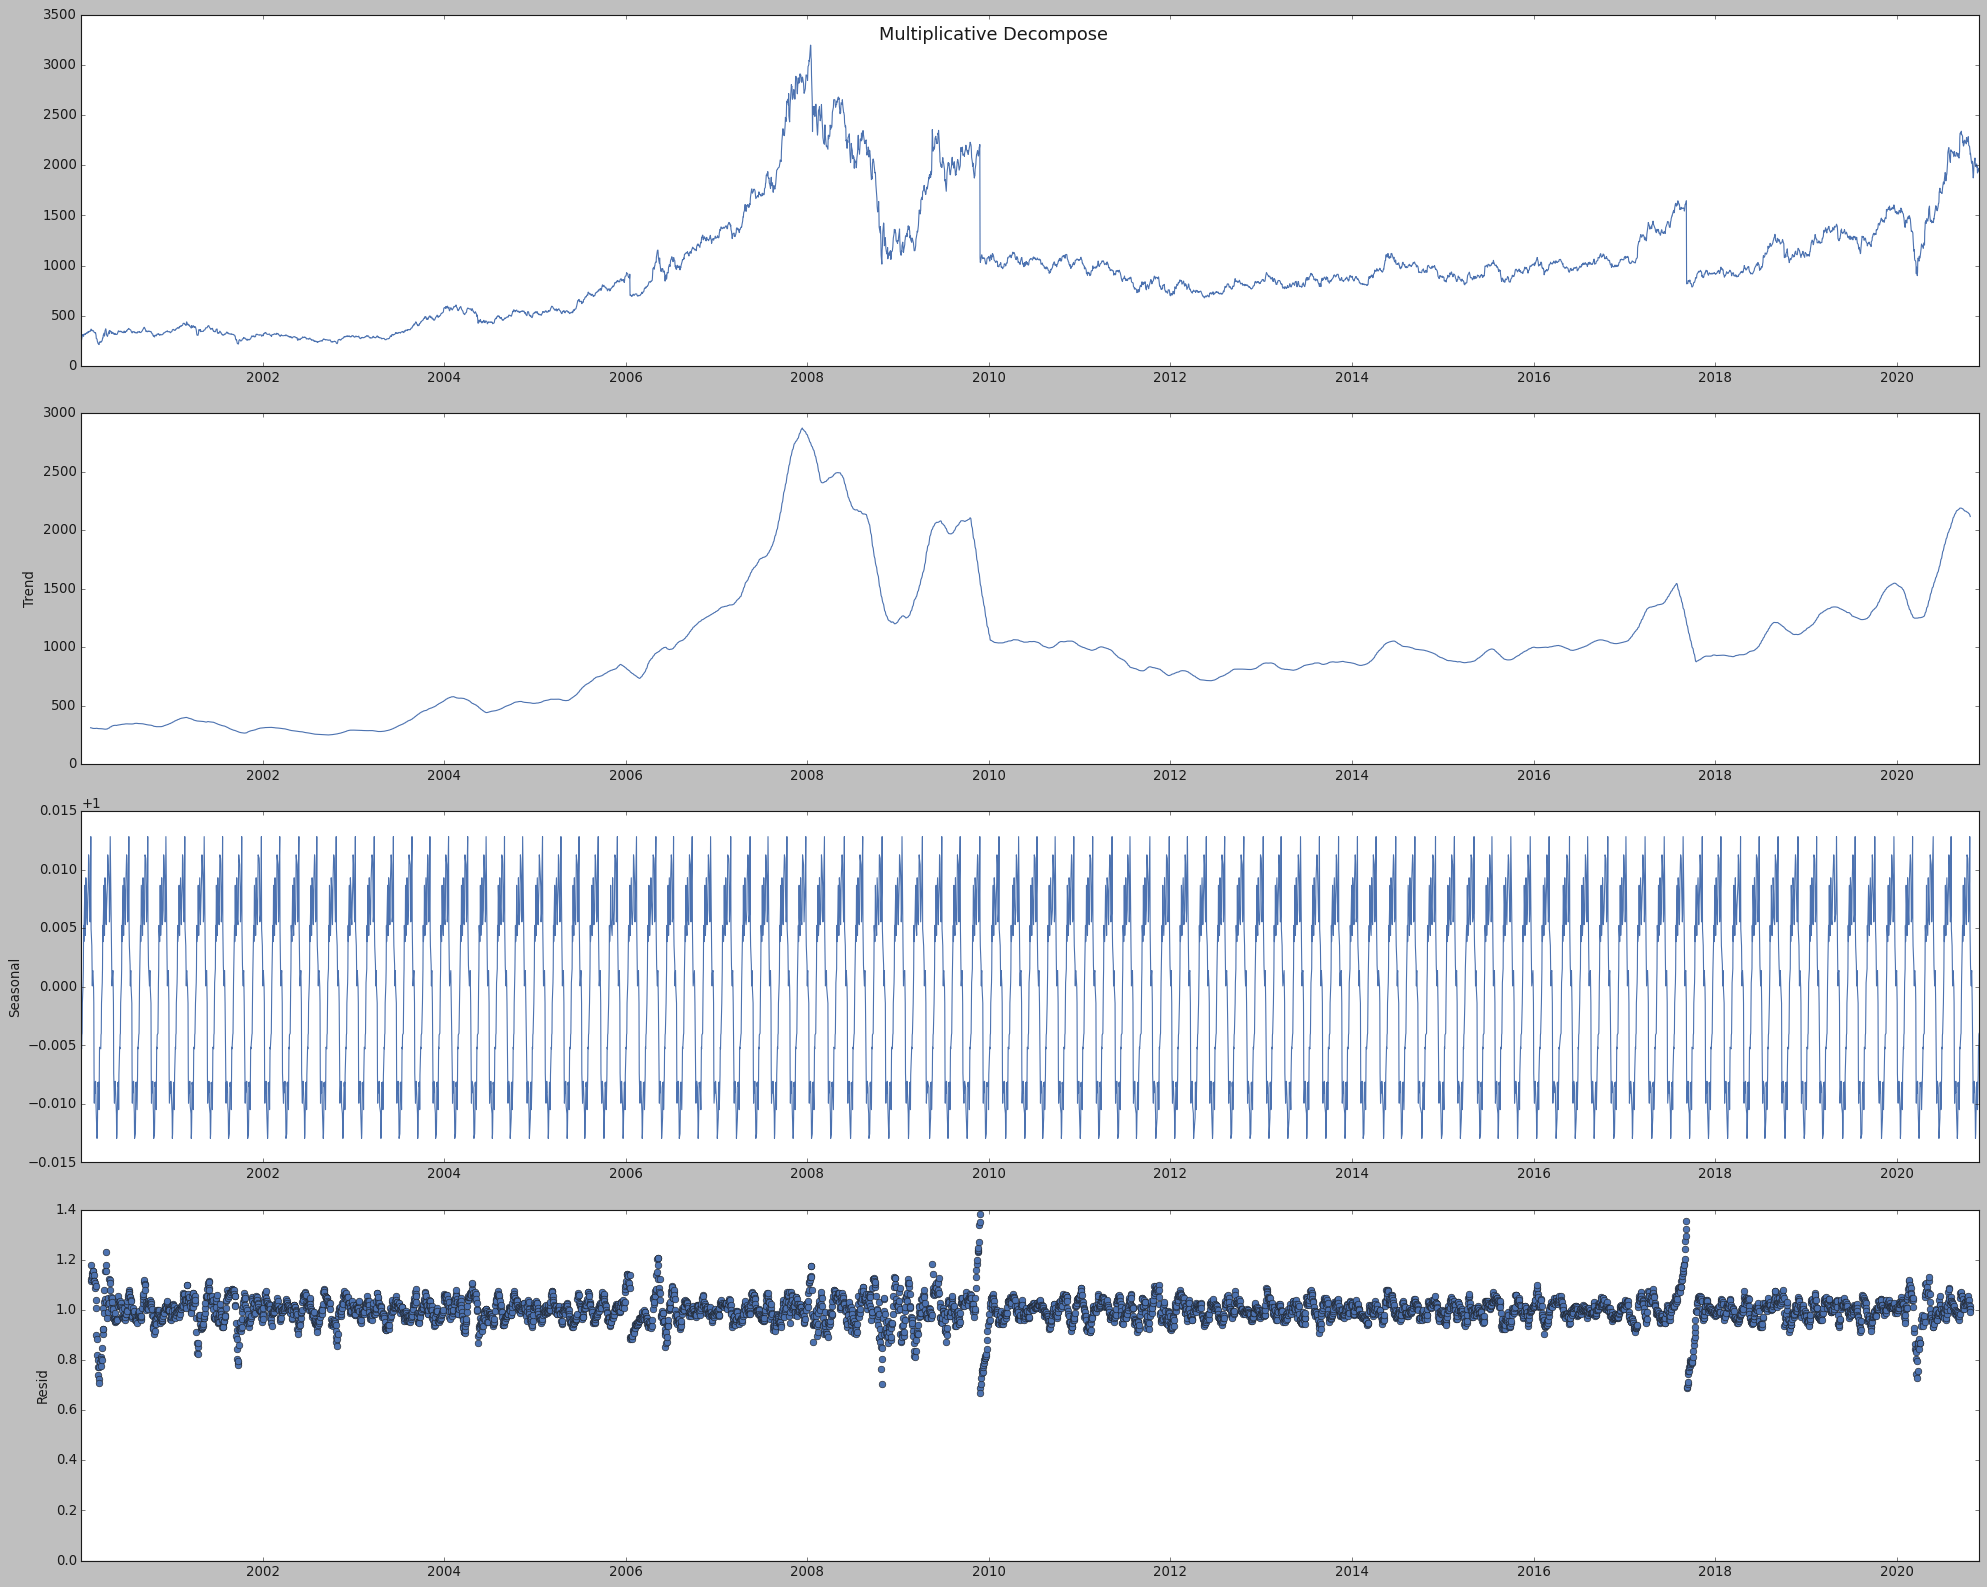

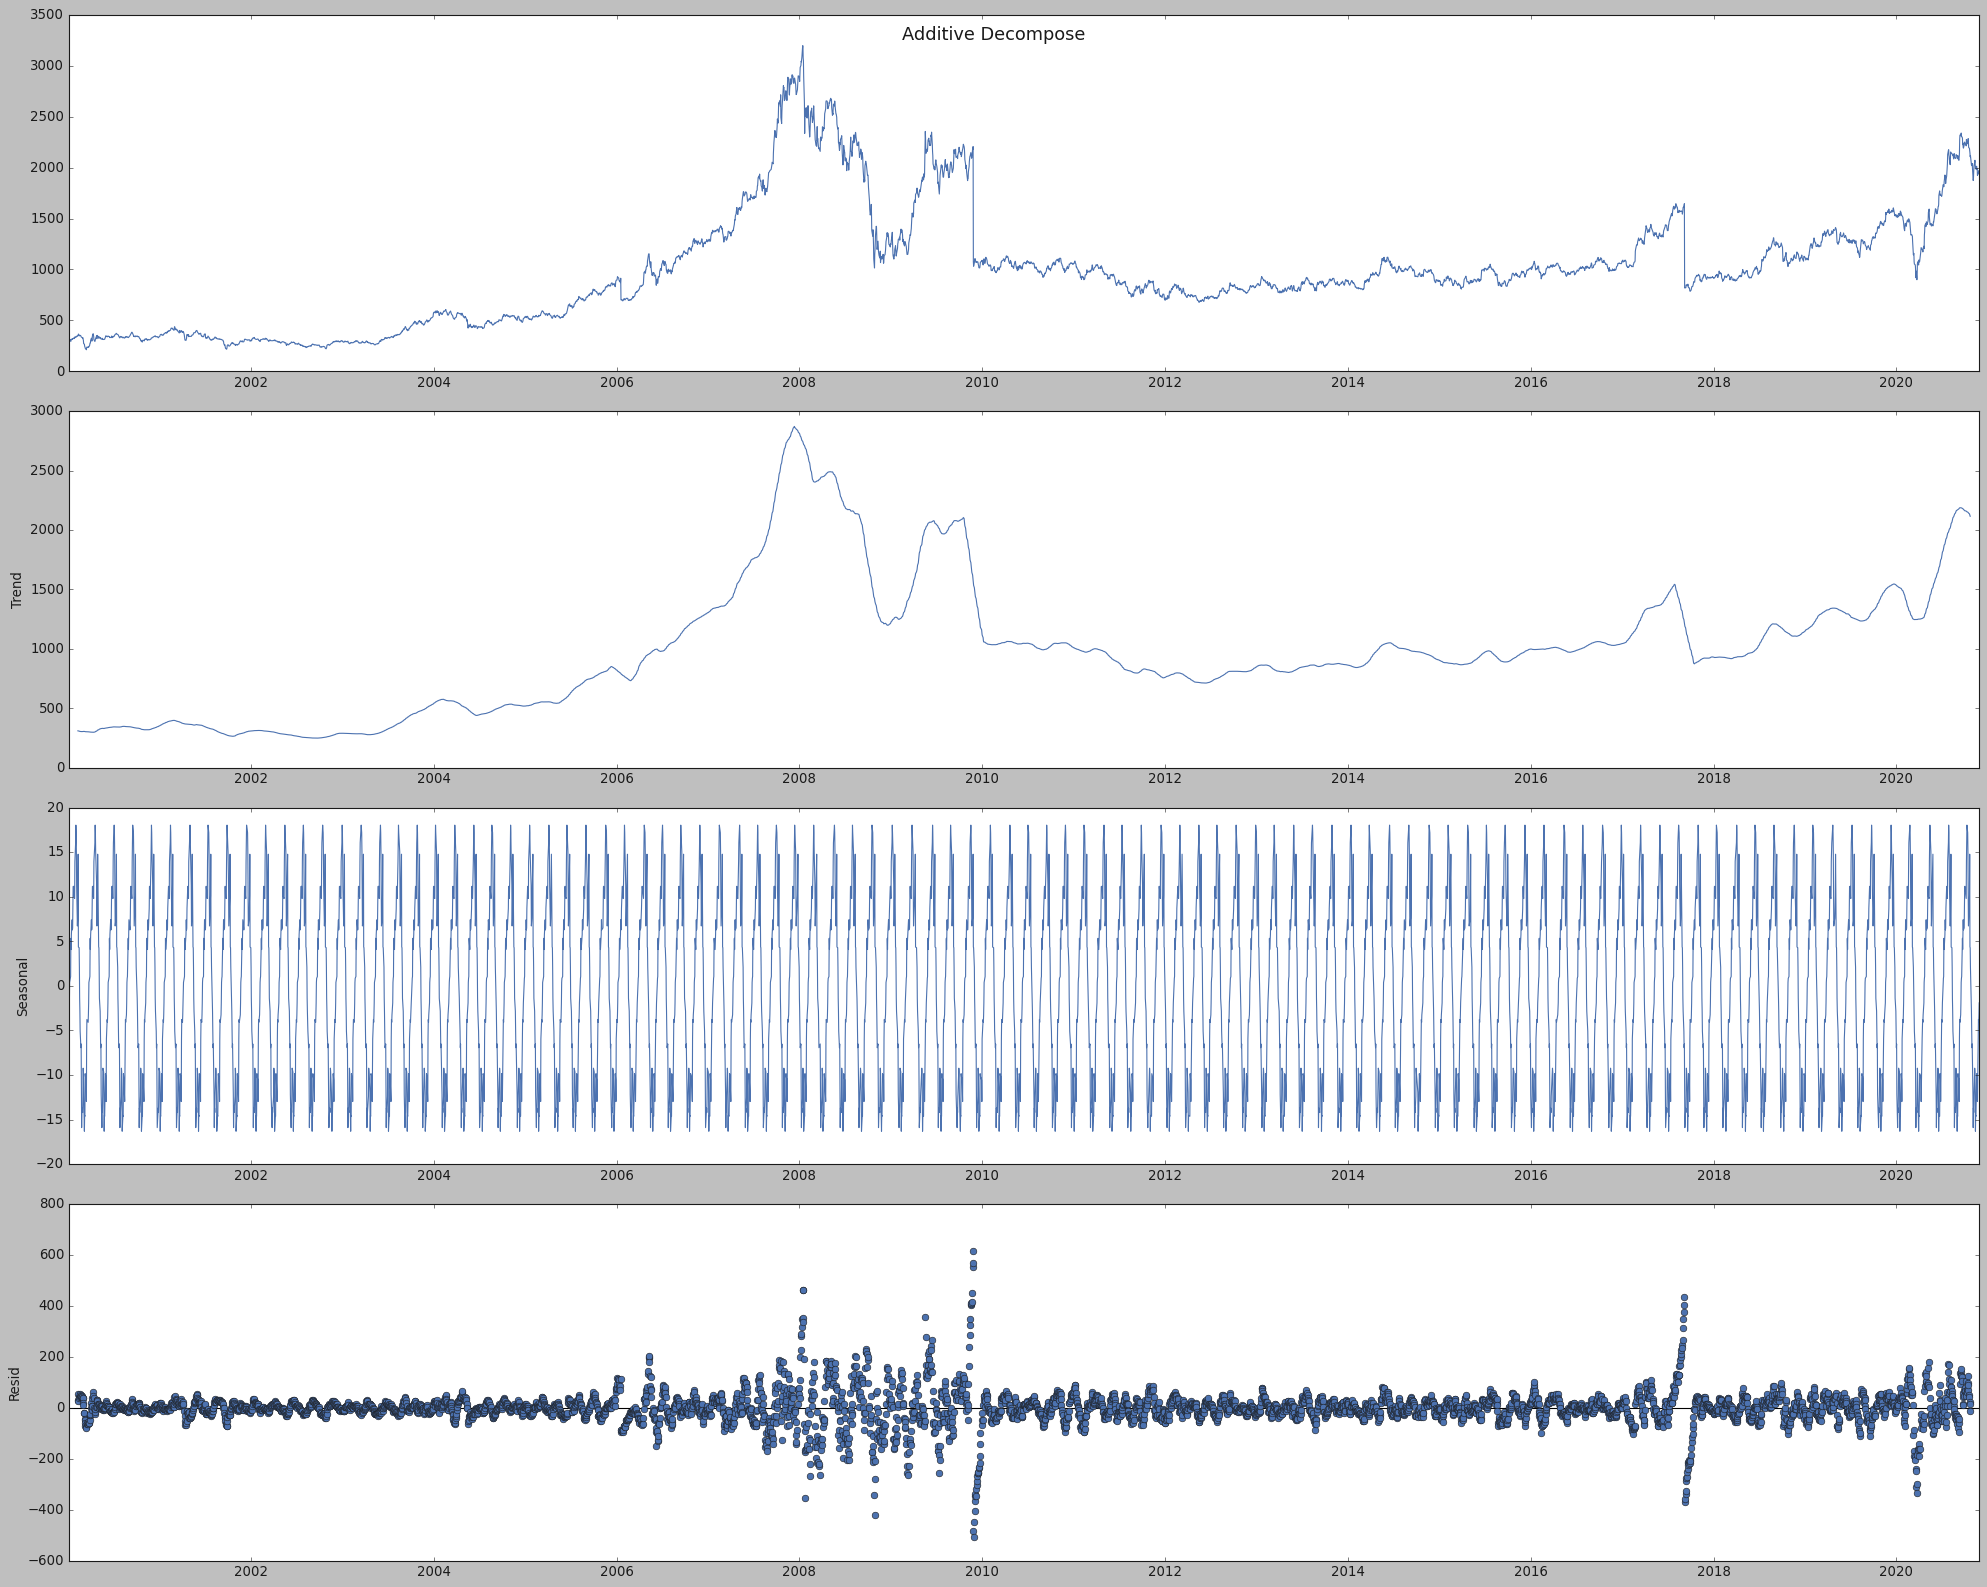

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = rel['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (25,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

cyclic patter is shown in every 30 days (monthly)

### Convert Stationary into Non Stationary

In [53]:
rel['vwap_diff']=rel['VWAP']-rel['VWAP'].shift(1)

In [54]:
fig = go.Figure([go.Scatter(x=rel.index,y=rel.VWAP)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='VWAP over time ')
fig.show()

In [55]:
fig = go.Figure([go.Scatter(x=rel.index,y=rel.vwap_diff)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference VWAP over time ')
fig.show()

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

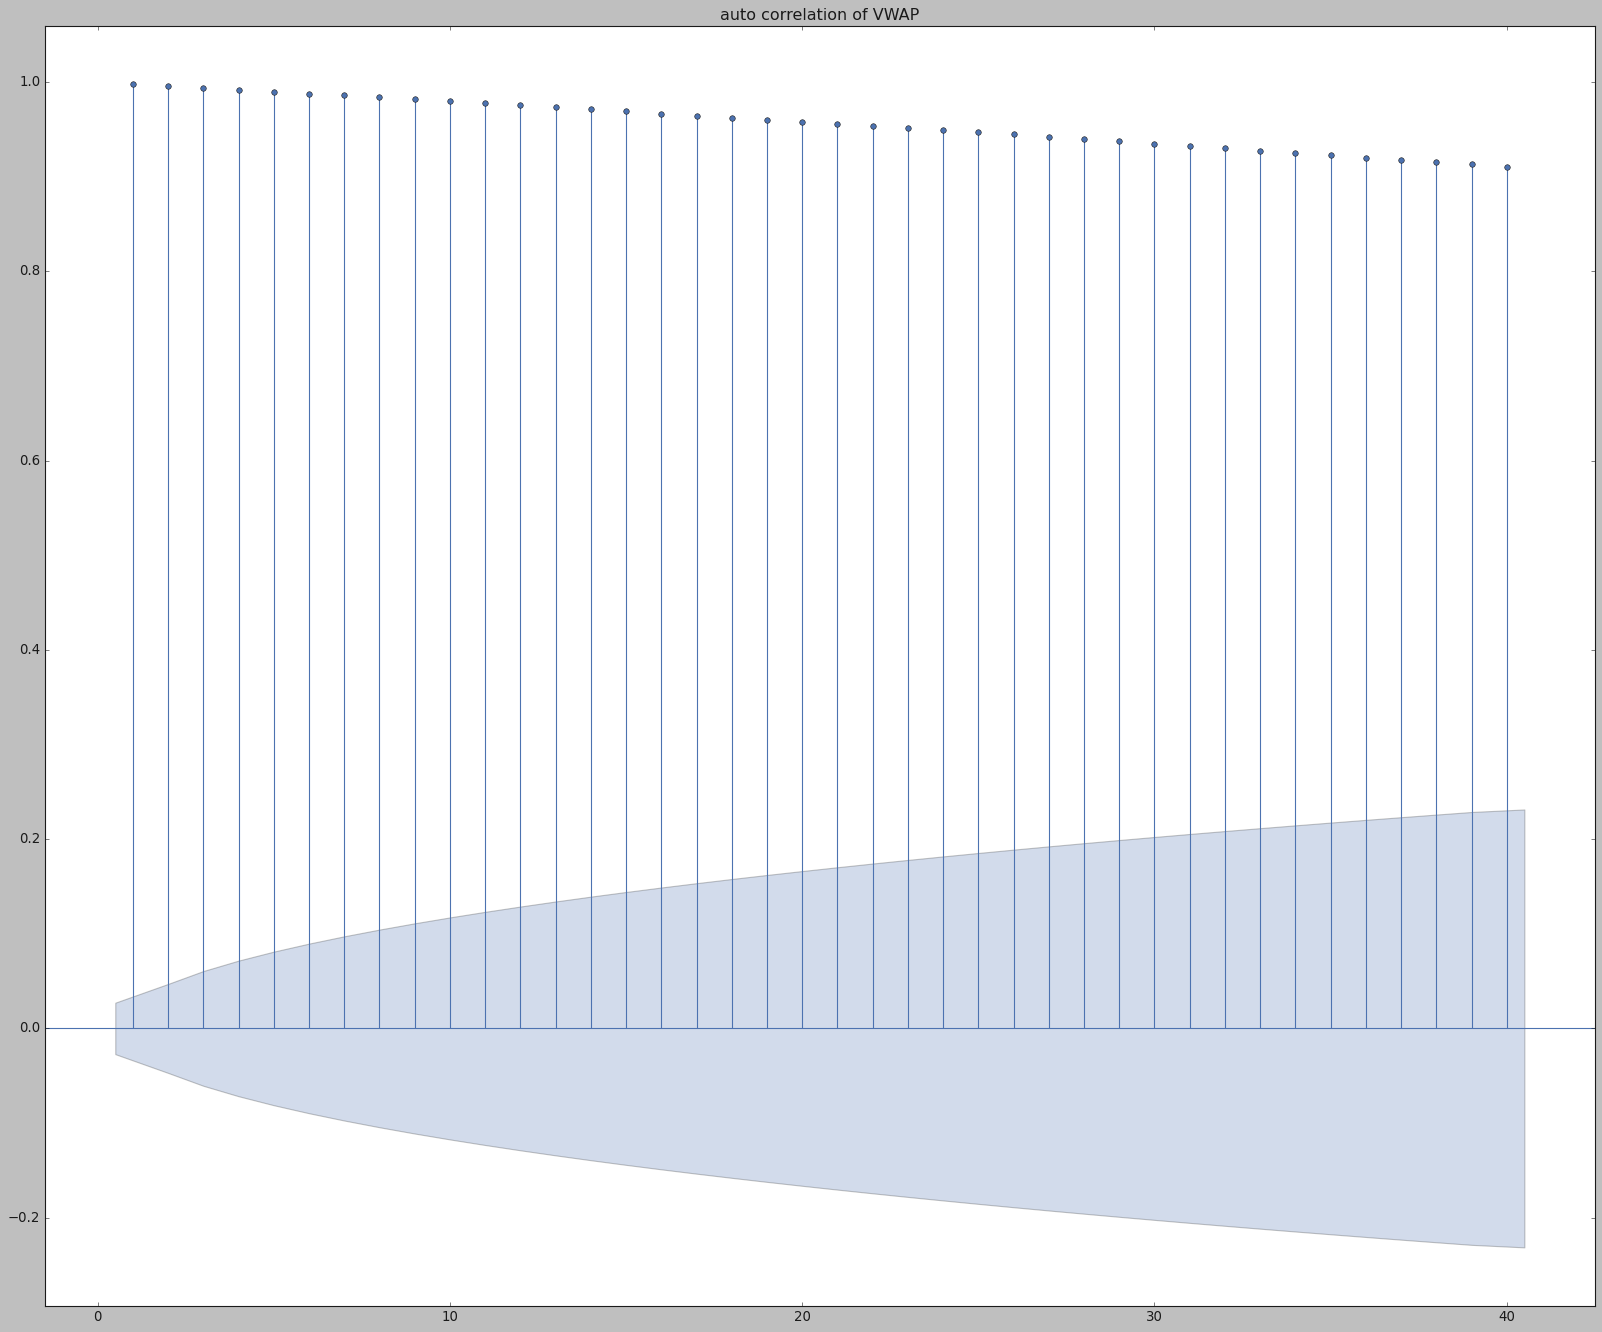

In [56]:
sm.graphics.tsa.plot_acf(rel['VWAP'].iloc[1:], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

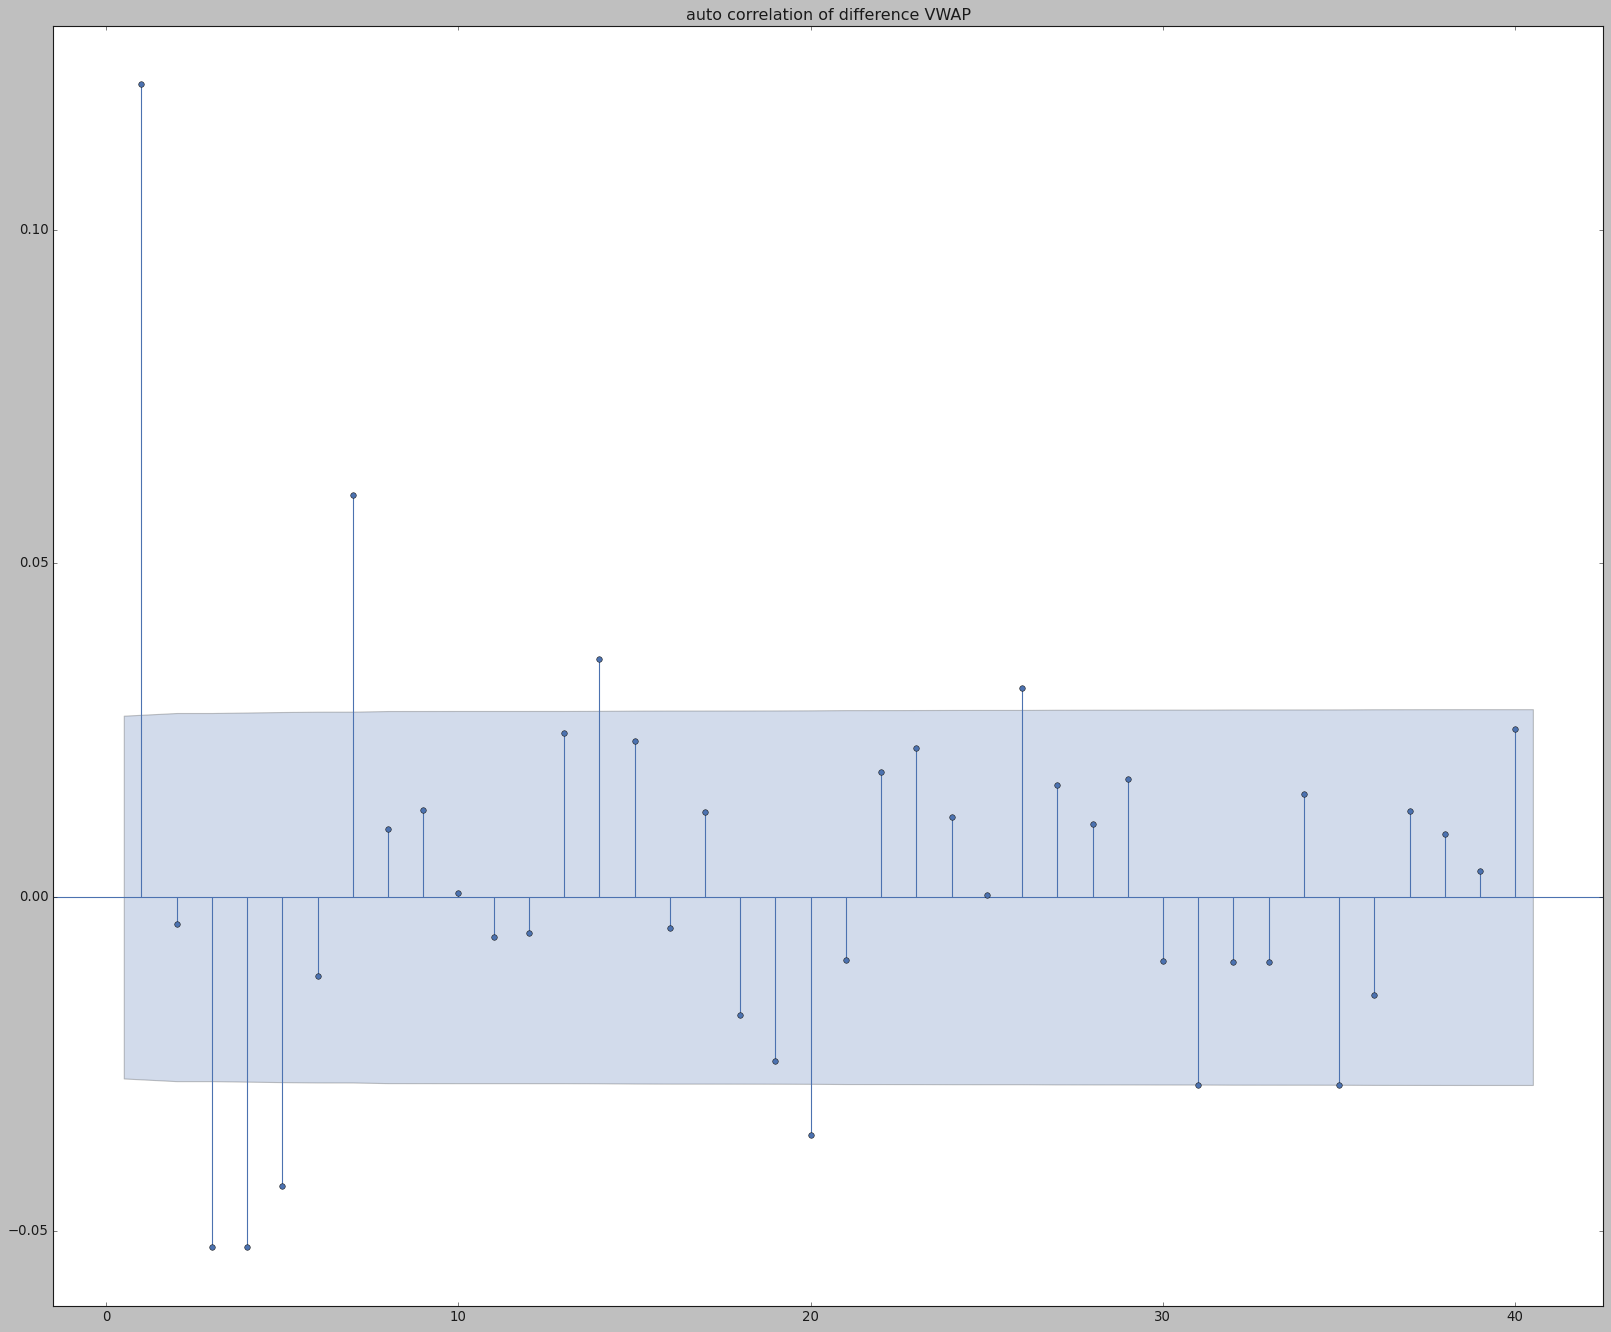

In [57]:
sm.graphics.tsa.plot_acf(rel['vwap_diff'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

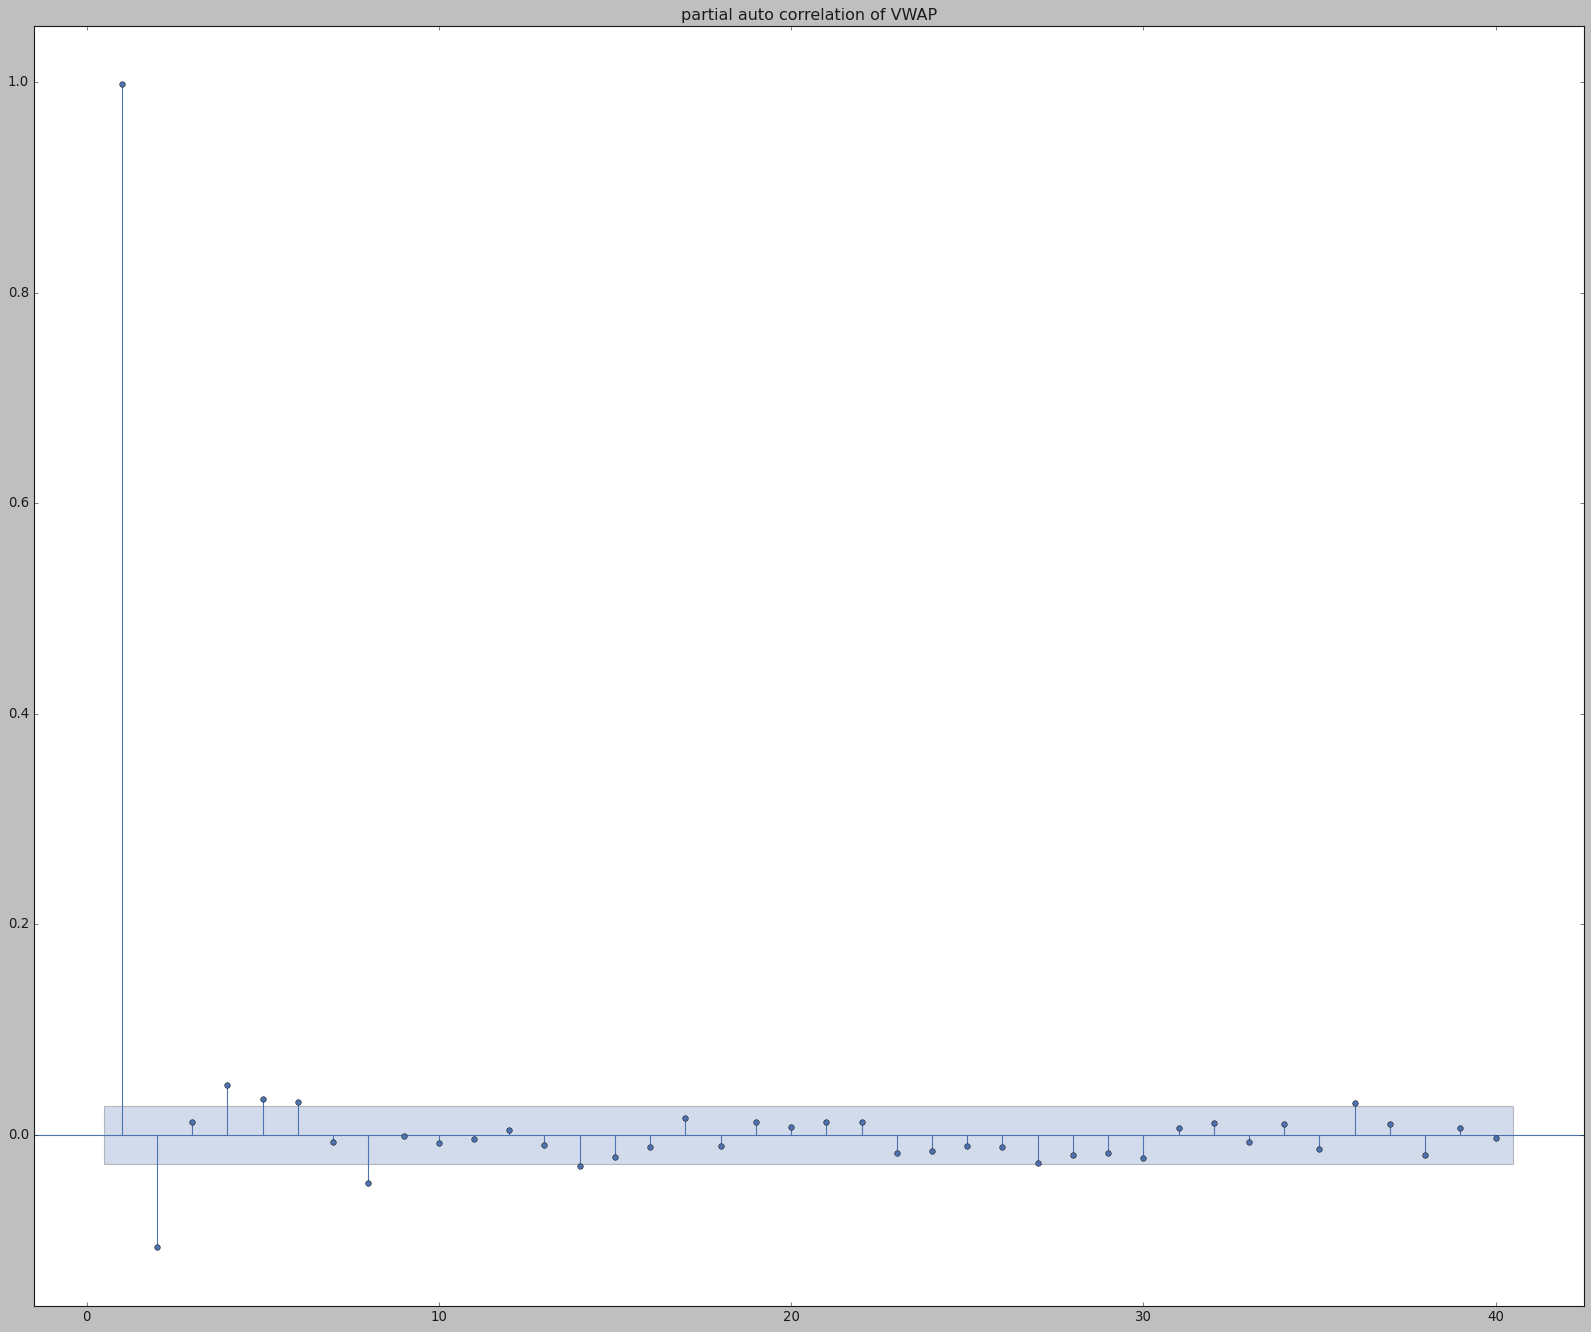

In [58]:
sm.graphics.tsa.plot_pacf(rel['VWAP'].iloc[1:], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()